In [16]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from tensorflow import keras

2023-01-24 16:31:06.658924: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [10]:
housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)

X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [18]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation = 'relu', input_shape = X_train.shape[1:]),
    keras.layers.Dense(1)
])

model.compile(loss='mean_squared_error', optimizer = 'sgd')
history = model.fit(X_train, y_train, epochs = 20, validation_data = (X_valid, y_valid))
mse_tets = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 1.8207 - val_loss: 0.6192
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4744 - val_loss: 0.4295
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4098 - val_loss: 0.4140
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3946 - val_loss: 0.4023
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4571 - val_loss: 0.4117
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3865 - val_loss: 0.3929
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3748 - val_loss: 0.3863
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3673 - val_loss: 0.3838
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3632 - val_loss: 0.3828
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3603 - val_loss: 0.3807

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


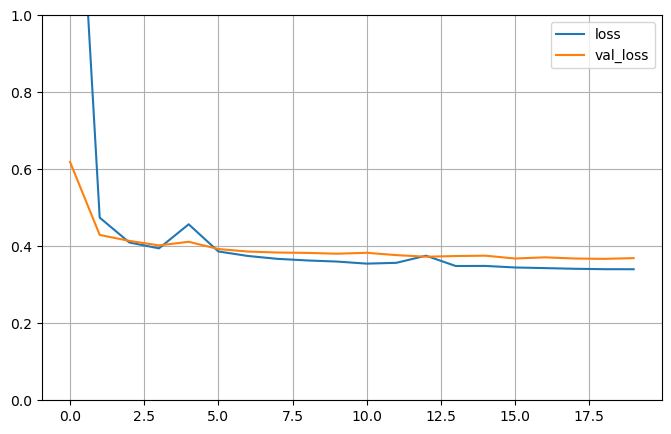

In [20]:

pd.DataFrame(history.history).plot(figsize = (8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [21]:
#Wide and Deep | Functional API

input_ = keras.Input(shape = X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation = 'relu')(input_)
hidden2 = keras.layers.Dense(30, activation = 'relu')(hidden1)
concat = keras.layers.Concatenate()([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs=[input_], outputs = [output])

In [26]:
#Sending inputs through wide and deep path separately

input_A = keras.Input(shape = [5], name = 'wide_input')
input_B = keras.Input(shape = [6], name = 'deep_input')
hidden1 = keras.layers.Dense(30, activation = 'relu')(input_B)
hidden2 = keras.layers.Dense(30, activation = 'relu')(hidden1)
concat = keras.layers.Concatenate()([input_A, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs=[input_A, input_B], outputs = [output])

model.compile(loss = 'mse', optimizer = keras.optimizers.SGD(learning_rate = 1e-3))

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit((X_train_A, X_train_B), y_train, epochs = 20, validation_data = ((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 0.9243 - val_loss: 0.8999
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.9226 - val_loss: 0.5373
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5059 - val_loss: 0.4928
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4788 - val_loss: 0.4740
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4631 - val_loss: 0.4621
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4544 - val_loss: 0.4471
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4765 - val_loss: 0.4413
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4257 - val_loss: 0.4230
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4136 - val_loss: 0.4177
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4041 - val_loss: 0.4044

In [29]:
#creating multiple outputs

output = keras.layers.Dense(1, name = 'main_output')(concat)
aux_output = keras.layers.Dense(1, name = 'aux_output')(hidden2)
model = keras.Model(inputs = [input_A, input_B], outputs = [output, aux_output])

In [30]:
model.compile(loss = ['mse','mse'], loss_weights=[0.9,0.1], optimizer = 'sgd')

history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs = 20, 
                    validation_data = ([X_valid_A, X_valid_B], [y_valid, y_valid]))

total_loss, main_loss, aux_loss = model.evaluate([X_test_A, X_test_B], [y_test, y_test])

y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

Epoch 1/20
363/363 [==============================] - 2s 3ms/step - loss: 0.6531 - main_output_loss: 0.5716 - aux_output_loss: 1.3859 - val_loss: 0.4530 - val_main_output_loss: 0.4115 - val_aux_output_loss: 0.8264
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4192 - main_output_loss: 0.3841 - aux_output_loss: 0.7352 - val_loss: 0.4194 - val_main_output_loss: 0.3891 - val_aux_output_loss: 0.6926
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3985 - main_output_loss: 0.3719 - aux_output_loss: 0.6372 - val_loss: 0.4108 - val_main_output_loss: 0.3865 - val_aux_output_loss: 0.6293
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3910 - main_output_loss: 0.3696 - aux_output_loss: 0.5833 - val_loss: 0.3980 - val_main_output_loss: 0.3775 - val_aux_output_loss: 0.5825
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3815 - main_output_loss: 0.3625 - aux_output_loss: 0.5530 - val_loss